In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Wind_Data.csv')
data

,dia,regional wind,wind gap norte sur
0,1,8.000000,0.000000
1,2,8.346296,0.181523
2,3,10.062316,0.188643
3,4,10.791337,0.071085
4,5,10.754093,0.078442
...,...,...,...
3645,3646,8.642231,-0.869425
3646,3647,6.527408,-1.268447
3647,3648,6.230707,-1.149234
3648,3649,5.550882,-0.420431


In [3]:
def daily_dif(current_wind, previous_wind):
    # Calcula el retorno diario como la diferencia porcentual entre los wind
    return (current_wind - previous_wind)

data['wind_increase'] = daily_dif(data['regional wind'], data['regional wind'].shift(1))
data

,dia,regional wind,wind gap norte sur,wind_increase
0,1,8.000000,0.000000,NaN
1,2,8.346296,0.181523,0.346296
2,3,10.062316,0.188643,1.716019
3,4,10.791337,0.071085,0.729021
4,5,10.754093,0.078442,-0.037244
...,...,...,...,...
3645,3646,8.642231,-0.869425,0.940298
3646,3647,6.527408,-1.268447,-2.114824
3647,3648,6.230707,-1.149234,-0.296701
3648,3649,5.550882,-0.420431,-0.679825


In [4]:
Y = (data['wind_increase'])[1:].values
Y

array([ 0.34629632,  1.71601931,  0.72902099, ..., -0.29670083,
       -0.67982467,  0.99456757])

In [5]:
delta = 1/365

def theta(i):
    return 6 + 2 * math.cos(2*math.pi * (i-1)/365)

In [6]:
data['theta'] = data['dia'].apply(theta)

data

,dia,regional wind,wind gap norte sur,wind_increase,theta
0,1,8.000000,0.000000,NaN,8.000000
1,2,8.346296,0.181523,0.346296,7.999704
2,3,10.062316,0.188643,1.716019,7.998815
3,4,10.791337,0.071085,0.729021,7.997334
4,5,10.754093,0.078442,-0.037244,7.995261
...,...,...,...,...,...
3645,3646,8.642231,-0.869425,0.940298,7.992596
3646,3647,6.527408,-1.268447,-2.114824,7.995261
3647,3648,6.230707,-1.149234,-0.296701,7.997334
3648,3649,5.550882,-0.420431,-0.679825,7.998815


In [7]:
s_i = data['regional wind'].shift(1)

In [8]:
theta = data['theta']
X = ((theta - s_i) * delta)[1:].values
X

array([-8.11839950e-07, -9.52004170e-04, -5.65748493e-03, ...,
        4.02719442e-03,  4.84413140e-03,  6.70910002e-03])

In [9]:
reg = LinearRegression().fit(X.reshape(-1,1), Y)

In [10]:
Y_pred = reg.predict(X.reshape(-1,1))
Y_pred

array([-0.01099343, -0.11471264, -0.62780417, ...,  0.42822543,
        0.51730527,  0.72066379])

In [11]:
error = Y - Y_pred
error

array([ 0.35728975,  1.83073195,  1.35682516, ..., -0.72492626,
       -1.19712994,  0.27390378])

In [12]:
c = np.sqrt(error.var())
c

0.8398113412047269

In [13]:
S_0 = data['regional wind'].iloc[0]
S_0

8.0

In [14]:
kappa = reg.coef_[0]
kappa

109.04125628331572

In [15]:
sigma = c / np.sqrt(delta)
sigma

16.04457314539312

In [16]:
def wind_paths(S_0, kappa, theta, sigma, delta, T):
    S = np.full(T, S_0)
    for t in range(1, T):
      S[t] = S[t-1] + kappa * (theta[t] - S[t-1]) * delta + np.sqrt(delta) * np.random.normal(0,1) * sigma
    return S

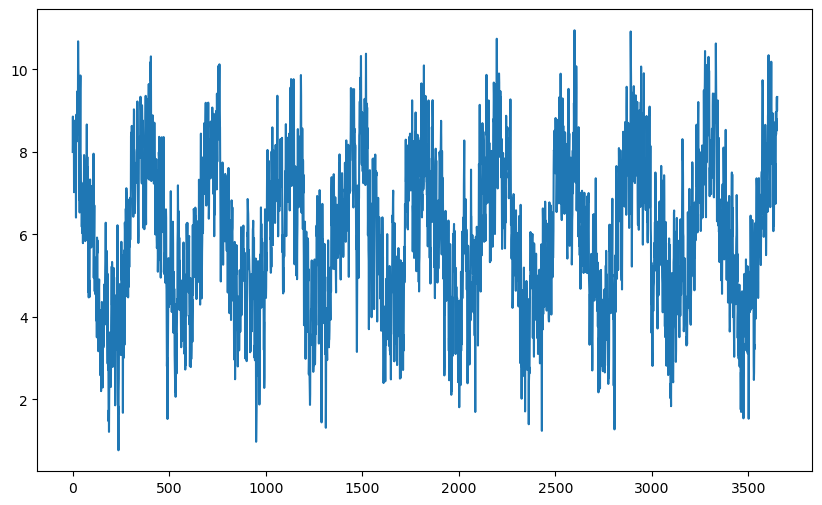

In [17]:
T = 365 * 10

S = wind_paths(S_0, kappa, theta, sigma, delta, T)
plt.figure(figsize = (10,6))
plt.plot(S)

In [18]:
data['gap_dif'] = daily_dif(data['wind gap norte sur'], data['wind gap norte sur'].shift(1))
data

,dia,regional wind,wind gap norte sur,wind_increase,theta,gap_dif
0,1,8.000000,0.000000,NaN,8.000000,NaN
1,2,8.346296,0.181523,0.346296,7.999704,0.181523
2,3,10.062316,0.188643,1.716019,7.998815,0.007120
3,4,10.791337,0.071085,0.729021,7.997334,-0.117558
4,5,10.754093,0.078442,-0.037244,7.995261,0.007358
...,...,...,...,...,...,...
3645,3646,8.642231,-0.869425,0.940298,7.992596,0.185931
3646,3647,6.527408,-1.268447,-2.114824,7.995261,-0.399021
3647,3648,6.230707,-1.149234,-0.296701,7.997334,0.119213
3648,3649,5.550882,-0.420431,-0.679825,7.998815,0.728803


In [19]:
Y_gap = (data['gap_dif'])[1:].values
Y_gap

array([ 0.18152327,  0.00711984, -0.1175584 , ...,  0.11921295,
        0.72880316,  0.67051818])

In [20]:
d_i = data['wind gap norte sur'].shift(1)

In [21]:
X_gap = (d_i * delta)[1:].values
X_gap

array([ 0.        ,  0.00049732,  0.00051683, ..., -0.0034752 ,
       -0.00314859, -0.00115186])

In [22]:
reg_gap = LinearRegression().fit(X_gap.reshape(-1,1), Y_gap)

In [23]:
Y_pred_gap = reg_gap.predict(X.reshape(-1,1))
Y_pred_gap

array([ 0.00418018,  0.05019633,  0.27783494, ..., -0.19068402,
       -0.23020525, -0.32042746])

In [24]:
error_gap = Y_gap - Y_pred_gap
error_gap

array([ 0.17734309, -0.04307649, -0.39539334, ...,  0.30989697,
        0.95900841,  0.99094564])

In [25]:
c_gap = np.sqrt(error_gap.var())

In [26]:
D_0 = data['wind gap norte sur'].iloc[0]
D_0

0.0

In [27]:
beta = -(reg_gap.coef_[0])
beta

48.37733323194379

In [28]:
gamma = c_gap /np.sqrt(delta)
gamma

10.845105393582847